In [304]:
#Import libraries 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split




In [396]:
#Import EMG Dataset
X = np.genfromtxt('traing_matrix05.csv', delimiter=',', skip_header=2)
X1 = np.genfromtxt('test_matrix05.csv', delimiter=',', skip_header=2)

m,n = np.shape(X)

x_train = []
y_train = [] 
x_test = []
y_test = []


#Split data x_train, y_train
x_train = X[:,1:n-7]
y_train = X[:,65:71]


#Test data 
x_test = X1[:,1:n-7]
y_test = X1[:,65:71]

y_class_test=X1[:,64]


In [397]:
print(np.shape(x_train))
print(np.shape(x_test))
print(np.shape(y_test))
print(np.shape(y_train))
print(m)
print(n)



(624, 63)
(240, 63)
(240, 6)
(624, 6)
624
71


In [398]:
print(y_test)
print(y_train)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [399]:
from operator import itemgetter, attrgetter
def KNN_Class_Prediction(x_train, x_test, y_train, N_classes, k):
    Pred=[]
    DD=[]
    P=[]
    xl,xh=np.shape(x_train)
    xxl,xxh=np.shape(x_test)
    
    for h in range (0,xxh):
        DD=[]
        for i in range(0,xh-1):
            D=0;
            for j in range(0,xl-1):
                D=D+(np.square(x_test[0,i]-x_train[j,i]))
            DD.append([])
            DD[i]=[i,np.sqrt(D)]
        DD=sorted(DD, key=itemgetter(1))
        DD=np.array(DD)
        DD=DD.astype(int)
        P.append([])
        P[h]=np.sum(y_train[DD[0:k-1,0],3])/k
    
    return P

In [333]:
y_pred=KNN_Class_Prediction(x_train,x_test,y_train,6,50)

In [334]:
print(y_pred)
print(len(y_pred))
print(y_test[200])
print(y_train[[2,8,14,18,24,30,36,42,48,54],2])

[0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18]
63
[0. 0. 1. 0. 0. 0.]
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]


In [436]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report 
g = 6
y_pred = []
y_prob = [] 

for i in range(6):
    y_pred.append([])
    y_prob.append([]) 
    n = KNeighborsClassifier(n_neighbors = 104, p=2 )
    y_pred[i] = n.fit(x_train, y_train[:,i])
    y_prob[i]  = n.predict_proba(x_test)

print(np.shape(y_prob))  
        

(6, 240, 2)


In [437]:
print(y_class_test)
y_class_test=y_class_test.astype(int)
print(y_class_test)

[1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1
 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2
 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3
 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4
 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5
 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6
 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6]
[1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1
 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2
 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3
 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4
 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5
 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6
 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6]


In [438]:
 
y_class = []
error = 0
for j in range(240):
    y_class.append([])
    h = 0    
    for i in range(6):
        
        if y_prob[i][j][1] > h:
            y_class[j]=i+1
            h=y_prob[i][j][1]
    if y_class[j] != y_class_test[i]:
        error = error +1

#y_pred = n.predict(x_test)


#print(n.predict_proba(x_test))

print(y_class)
print(error)


[1, 2, 3, 4, 4, 6, 1, 2, 4, 4, 6, 6, 4, 2, 6, 4, 4, 6, 4, 6, 4, 4, 6, 6, 4, 2, 6, 4, 4, 4, 6, 2, 6, 4, 5, 6, 1, 2, 3, 4, 4, 6, 1, 3, 4, 4, 6, 6, 1, 2, 2, 4, 4, 6, 1, 2, 4, 4, 6, 6, 1, 2, 3, 4, 5, 6, 4, 3, 4, 2, 6, 6, 1, 2, 2, 2, 4, 6, 1, 2, 4, 1, 6, 6, 1, 2, 3, 4, 4, 6, 1, 3, 4, 4, 6, 6, 1, 1, 4, 4, 6, 6, 5, 5, 1, 4, 4, 6, 1, 6, 4, 5, 6, 6, 4, 6, 4, 4, 6, 6, 1, 1, 4, 4, 6, 6, 1, 3, 4, 5, 6, 6, 1, 3, 4, 4, 6, 6, 1, 2, 4, 4, 6, 6, 1, 1, 4, 4, 6, 6, 4, 2, 4, 4, 6, 6, 5, 2, 4, 2, 4, 4, 5, 2, 4, 5, 4, 4, 1, 2, 4, 4, 6, 6, 1, 3, 4, 4, 3, 3, 1, 3, 4, 5, 6, 6, 1, 3, 4, 4, 6, 6, 1, 3, 4, 4, 3, 3, 1, 3, 4, 4, 6, 6, 1, 6, 4, 5, 6, 6, 1, 1, 4, 4, 2, 2, 1, 3, 4, 5, 6, 6, 1, 3, 4, 4, 6, 6, 1, 2, 4, 4, 6, 6, 1, 6, 4, 4, 6, 6]
172


In [387]:
#print(n.predict_proba(x_test))
prob=n.predict_proba(x_test)
#print(prob)
print(prob[121,:])


[1. 0.]


In [364]:
knn = KNeighborsClassifier(n_neighbors = 50).fit(x_train, y_train)

In [344]:
print(classification_report(y_test[:,0], y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       200
         1.0       0.93      0.68      0.78        40

    accuracy                           0.94       240
   macro avg       0.93      0.83      0.87       240
weighted avg       0.94      0.94      0.93       240



In [ ]:
knn_predict = knn.predict()

In [258]:
print(y_pred)
print(y_test[200,2])
print(np.shape(y_pred))
print(np.array(y_pred))
yy=np.array(y_pred)
#print(yy[0:100,0])

([0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055, 0.055], array([[  13,    1],
       [  14,    1],
       [  29,    1],
       [  30,    1],
       [  53,    1],
       [  54,    1],
       [   5,    1],
       [   6,    1],
       [  61,    1],
       [  37,    2],
       [  38,    2],
       [  45,    2],
       [  46,    2],
       [  48,    2],
       [   0,    2],
       [  21,    2],
       [  22,    2],
       [  56,    2],
       [  40,    3],
       [   8,    3],
       [  16,    5],
       [  24,    6],
       [  32,    7],
       [  41,    7],
       [  49,    8],
       [  47,    8],
       [  39,    

ValueError: could not broadcast input array from shape (62,2) into shape (62)

In [16]:
distance 

#view distance matrix 
def distance_cost_grid(distances):
    im = plt.imshow(distances, interpolation='nearest', cmap='Reds') 
    plt.gca().invert_yaxis()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.colorbar();
    

TypeError: Image data of dtype object cannot be converted to float

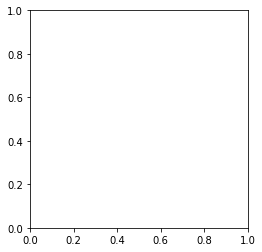

In [17]:
distance_cost_grid(distance)

In [18]:
np.array(x_train)

array([[2.14009950e-02, 5.98579000e-02, 6.96497590e-01, ...,
        6.24415967e+01, 7.27772442e-01, 7.27772442e-01],
       [1.57046055e-01, 4.67667184e-01, 9.84250144e-01, ...,
        4.57180088e+01, 7.29494383e-01, 7.29494383e-01],
       [1.71323955e-01, 1.67300549e-01, 1.40920440e+00, ...,
        4.44866291e+01, 5.98878356e-01, 5.98878356e-01],
       ...,
       [6.49464230e-02, 1.30836992e-01, 2.75236940e-01, ...,
        1.46716716e+01, 6.07373925e-01, 6.07373925e-01],
       [8.94457420e-02, 6.78925200e-02, 4.38907103e-01, ...,
        2.36233059e+01, 6.04955670e-01, 6.04955670e-01],
       [1.81017378e-01, 1.88122721e-01, 1.01189888e+00, ...,
        5.14200844e+01, 6.50080402e-01, 6.50080402e-01]])

In [19]:
#test with small data set 
X = np.random.random((100,10))
y = np.random.randint(0,2, (100))
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
#Using Dynamic time warp as custom metric 
def DTW(x,y):   
    i = x.size
    j = y.size
    #compute distance matrix using library 
    distance_mat = distance.cdist(x.reshape(-1,1),y.reshape(-1,1))
    #initialize cumulative distance array with inf and start point (0,0)
    cumdist = np.matrix(np.ones((i+1,j+1)) * np.inf)
    cumdist[0,0] = 0 #start point 

    for i in range(i):
        for j in range(j):
            minimum_cost = np.min([cumdist[i, j+1],
                                   cumdist[i+1, j],
                                   cumdist[i, j]])
            cumdist[i+1, j+1] = distance_mat[i,j] + minimum_cost

    return cumdist[i, j]  

#Train using knn library 
parameters = {'n_neighbors':[2,4,8]} #using one 
clf = GridSearchCV(KNeighborsClassifier(metric=DTW), parameters, verbose=3)
clf.fit(x_train, y_train)


#evaluate
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))

C:\Users\rji284\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.481, total=   0.8s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.519, total=   0.8s
[CV] n_neighbors=2 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ....................... n_neighbors=2, score=0.500, total=   0.8s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.481, total=   1.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.519, total=   1.0s
[CV] n_neighbors=4 ...................................................
[CV] ....................... n_neighbors=4, score=0.500, total=   0.8s
[CV] n_neighbors=8 ...................................................
[CV] ....................... n_neighbors=8, score=0.481, total=   0.8s
[CV] n_neighbors=8 ...................................................
[CV] ....................... n_neighbors=8, score=0.519, total=   0.8s
[CV] n_neighbors=8 ...................................................
[CV] ....................... n_neighbors=8, score=0.500, total=   0.8s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    7.5s finished


              precision    recall  f1-score   support

           0       0.60      1.00      0.75        12
           1       0.00      0.00      0.00         8

    accuracy                           0.60        20
   macro avg       0.30      0.50      0.37        20
weighted avg       0.36      0.60      0.45        20



C:\Users\rji284\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
""""#Use DTW with in-built knn from library 
#accumulated cost for taking all paths: we want to find the min path in the cost matrix 
#start from (0,0)
def Dynamic_time_warp(x):
#input is the two time series data => train and test 
#output is the minimum paths 

#compute the distance matrix using the euclidean distance between points 
    for i in range(len(x)):
        for j in range(len(x)):
            distance[i,j] =  (x[j] - x[i])**2
        
        
    cost_mat = np.zeros((len(x), len(x))) #initialize cost matrix 

    #Starting point 
    cost_mat[0,0] =  distance[0,0] 

    #moving along the first row form (0,0)
    for i in range(1, len(x)):
        cost_mat[0,i] =  distance[0,i] +cost_mat[0,i-1]

    #moving from (0,0) upwards 
    for i in range(1,len(x)):
        cost_mat[i,0] = distance[i,0] + cost_mat[i-1, 0]
    
    #compute minimum 
    for i in range(1,len(x)):
        for i in range(1,len(x)):
            cost_mat[i,j] = distance[i,j] + min(cost_mat[i-1, j-1], cost_mat[i-1, j], cost_mat[i, j-1])
        
    return cost_mat[i,j]"""
